#  Bankruptcy Prediction Using Logistic Regression — A Business-Centric Evaluation of Accuracy, Precision, Recall, F1 Score, and ROC Curve on the American Bankruptcy Dataset

### Data Description

| Column Name         | Description                                       |
| ------------------- | ------------------------------------------------- |
| `status_label`      | Binary indicator for bankruptcy (0 = No, 1 = Yes) |
| `total_assets`      | Financial total of all assets owned               |
| `total_liabilities` | Company’s total obligations/debts                 |
| `current_ratio`     | Measure of liquidity (short-term solvency)        |
| `quick_ratio`       | Conservative liquidity measure                    |
| `cash_flow`         | Operational cash movement                         |
| `net_income`        | Profit after expenses and taxes                   |
| `revenue`           | Income from primary business activities           |
| `gross_margin`      | Profitability before operating expenses           |
| `ebitda`            | Core earnings, pre-interest and tax               |
| `asset_turnover`    | Efficiency of using assets to generate revenue    |


### Importance of Logistic Regression in Classification Problems


Logistic Regression is one of the most widely used algorithms for binary classification tasks. Its importance lies in its simplicity, interpretability, and effectiveness in predicting categorical outcomes such as "bankrupt" or "not bankrupt".

In the context of this capstone project, where the goal is to predict corporate bankruptcy, Logistic Regression serves as a strong baseline model due to the following reasons:

✅ 1. Suitable for Binary Outcomes
It is specifically designed for problems where the output variable is binary (0 or 1), making it highly appropriate for predicting whether a company will go bankrupt or not.

✅ 2. Interpretability
Logistic Regression provides clear insights into how each feature affects the outcome. This is valuable in financial domains where transparency and explainability are important for decision-making.

✅ 3. Efficient and Scalable
The algorithm is computationally efficient and performs well even with relatively small or medium datasets, making it ideal for real-world applications.

✅ 4. Probabilistic Predictions
It predicts probabilities, not just categories. This helps in risk assessment, where companies can be classified based on the likelihood of going bankrupt, enabling proactive measures.

✅ 5. Regularization Support
With techniques like L1 (Lasso) and L2 (Ridge) regularization, Logistic Regression can handle overfitting and perform automatic feature selection, improving the robustness of the model.

✅ 6. Strong Baseline for Comparison
It often serves as a benchmark model against which more complex machine learning algorithms can be evaluated.





### Importance of Evaluation Methods in Machine Learning


Evaluation methods are essential to understand how well a machine learning model performs on new, unseen data. In classification problems like bankruptcy prediction, relying on just one metric (like accuracy) can be misleading, especially if the data is imbalanced. That’s why multiple evaluation methods are used to ensure the model is reliable and balanced.

✅ Accuracy
Measures how many predictions were correct overall.

Can be misleading when classes are imbalanced.

✅ Precision
Tells us how many predicted bankruptcies were actually correct.

Important when false positives are costly (e.g., flagging a non-bankrupt company).

✅ Recall (Sensitivity)
Shows how many actual bankrupt companies were correctly predicted.

Crucial when missing a true case (false negative) is more risky.

✅ F1 Score
The harmonic mean of precision and recall.

Useful when there’s a need to balance both false positives and false negatives.

✅ ROC Curve and AUC
The ROC Curve plots True Positive Rate vs. False Positive Rate.

AUC (Area Under Curve) measures the model’s ability to distinguish between classes.

AUC closer to 1 = better model performance.



### Loading Important Libarary

In [7]:
import pandas as pd       # For data manipulation and analysis (DataFrames, CSVs, etc.)
import numpy as np        # For numerical operations and working with arrays
import matplotlib.pyplot as plt  # For creating static plots and charts
import seaborn as sns     # For advanced and beautiful statistical visualizations

### Reading the dataset

In [8]:
# 📥 Loading the cleaned bankruptcy dataset into a DataFrame
bankruptcy=pd.read_csv("/content/american_bankruptcy_cleaned.csv")

### Tabular Analysis

In [9]:
# 👀 View the first 5 rows of the dataset
bankruptcy.head()

,status_label,total_assets,total_liabilities,current_ratio,quick_ratio,cash_flow,net_income,revenue,gross_margin,ebitda,asset_turnover
0,0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,180.447,201.026
1,0,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,179.987,204.065
2,0,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,217.699,139.603
3,0,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,164.658,124.106
4,0,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,248.666,131.884


In [10]:
# 🔚 View the last 5 rows of the dataset
bankruptcy.tail()

,status_label,total_assets,total_liabilities,current_ratio,quick_ratio,cash_flow,net_income,revenue,gross_margin,ebitda,asset_turnover
78677,0,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,184.666,28.095
78678,0,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,770.103,157.783
78679,0,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,683.985,156.341
78680,0,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,694.035,135.941
78681,0,82.589,68.817,65.201,67.262,2.112,-50.946,45.839,354.1786,632.122,84.995


In [11]:
# 📊 Get summary statistics for numerical columns
bankruptcy.describe()

,status_label,total_assets,total_liabilities,current_ratio,quick_ratio,cash_flow,net_income,revenue,gross_margin,ebitda,asset_turnover
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000
mean,0.066343,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,722.483710,532.467069
std,0.248882,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,3242.170946,6369.159440
min,0.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-0.023000,-102362.000000
25%,0.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,0.000000,-68.282750
50%,0.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,7.593500,-1.131000
75%,0.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,248.760750,146.070000
max,1.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,166250.000000,402089.000000


In [12]:
#MEAN
bankruptcy.mean()

,0
status_label,0.066343
total_assets,880.362485
total_liabilities,1594.529029
current_ratio,121.234256
quick_ratio,376.759424
cash_flow,201.605717
net_income,129.382453
revenue,286.832743
gross_margin,3414.354610
ebitda,722.483710


In [13]:
#MEDIAN
bankruptcy.median()

,0
status_label,0.00000
total_assets,100.44950
total_liabilities,103.66100
current_ratio,7.92950
quick_ratio,15.03450
cash_flow,7.02300
net_income,1.61600
revenue,22.82000
gross_margin,227.51185
ebitda,7.59350


Comparing mean and median values revealed strong skewness in variables like total_assets, cash_flow, and gross_margin, indicating the presence of significant outliers. This supported our decision to visualize distributions using boxplots and apply appropriate scaling methods before model training

In [14]:
# 🎲 View a random sample of rows from the dataset
bankruptcy.sample()

,status_label,total_assets,total_liabilities,current_ratio,quick_ratio,cash_flow,net_income,revenue,gross_margin,ebitda,asset_turnover
25359,0,506.933,428.827,62.708,154.09,133.649,34.938,158.733,723.6098,373.125,282.235


In [15]:
# 🧾 Get a concise summary of the DataFrame (columns, data types, non-null counts)
bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status_label       78682 non-null  int64  
 1   total_assets       78682 non-null  float64
 2   total_liabilities  78682 non-null  float64
 3   current_ratio      78682 non-null  float64
 4   quick_ratio        78682 non-null  float64
 5   cash_flow          78682 non-null  float64
 6   net_income         78682 non-null  float64
 7   revenue            78682 non-null  float64
 8   gross_margin       78682 non-null  float64
 9   ebitda             78682 non-null  float64
 10  asset_turnover     78682 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 6.6 MB


### Data Cleaning

In [16]:
# 🧾 Display all column names in the dataset
bankruptcy.columns

Index(['status_label', 'total_assets', 'total_liabilities', 'current_ratio',
       'quick_ratio', 'cash_flow', 'net_income', 'revenue', 'gross_margin',
       'ebitda', 'asset_turnover'],
      dtype='object')

In [17]:
# 🚨 Check for missing (null) values in each column
bankruptcy.isnull().sum()

,0
status_label,0
total_assets,0
total_liabilities,0
current_ratio,0
quick_ratio,0
cash_flow,0
net_income,0
revenue,0
gross_margin,0
ebitda,0


In [18]:
# 🔍 Check for total number of duplicated rows in the dataset
bankruptcy.duplicated().sum()

np.int64(0)

In [19]:
# 🧹 Remove duplicated rows from the dataset, if any
bankruptcy.drop_duplicates(inplace=True)

### Data Visulization

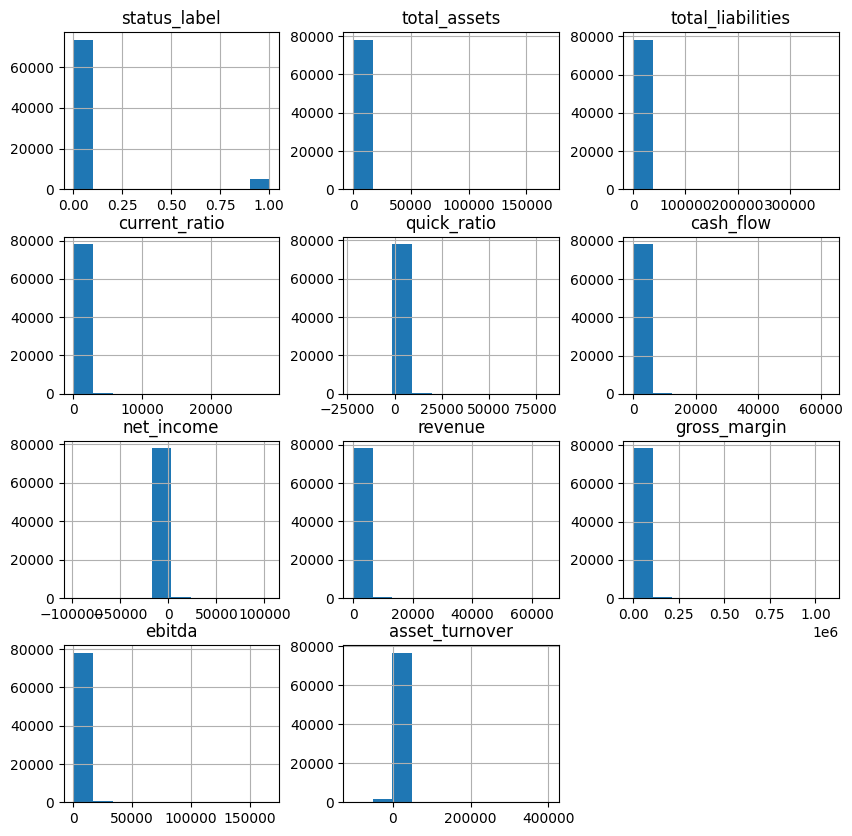

In [20]:
# 📊 Plot histograms for all numerical columns to visualize their distributions
bankruptcy.hist(figsize=(10,10))
# 📈 Display the plot
plt.show()


**📊 Insight from Histogram Plot**

The histograms reveal that many features such as total_assets, total_liabilities, net_income, revenue, and asset_turnover are heavily right-skewed, meaning a majority of companies have relatively low values with a few having extremely high values (outliers).

🧾 status_label is imbalanced — most companies are labeled as not bankrupt (0), which could bias the model.

💸 cash_flow, net_income, and ebitda show many companies have values near or below zero, signaling weak financial health.

📈 Features like current_ratio and quick_ratio also display extreme ranges, indicating a wide variability in liquidity among firms.



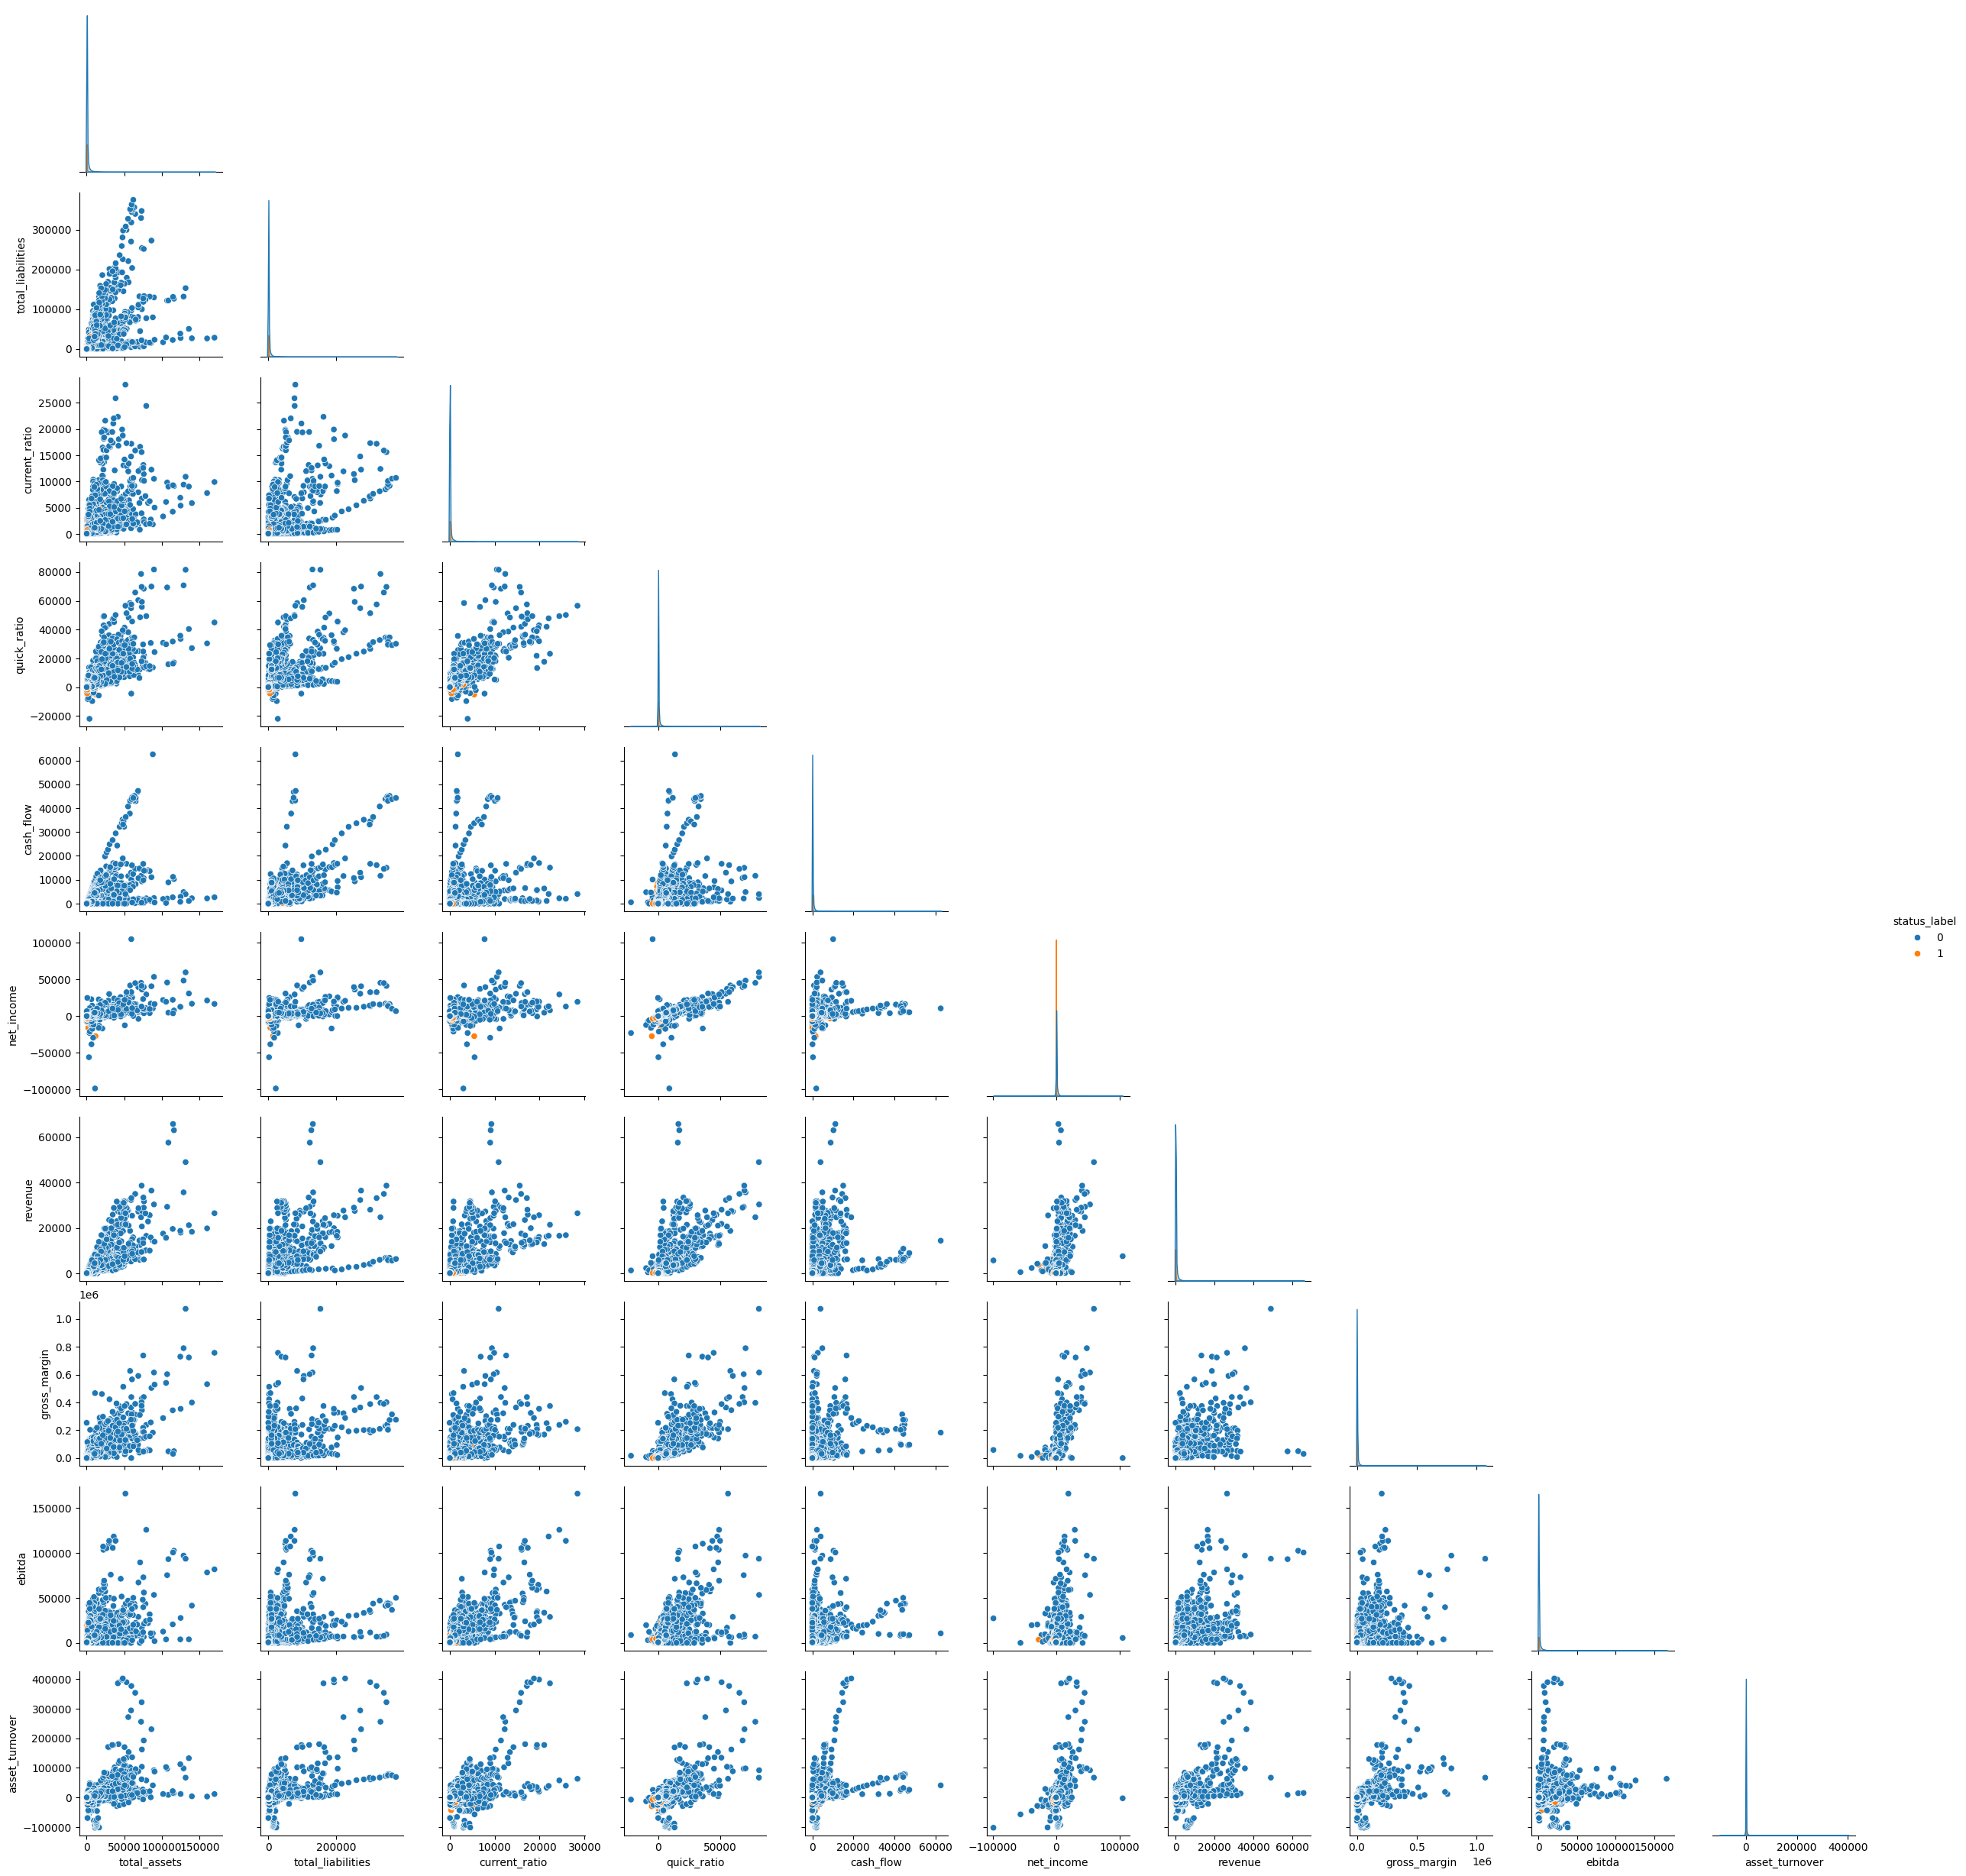

In [21]:
# 🔗 Visualize pairwise relationships between numerical features
sns.pairplot(bankruptcy, hue="status_label", corner=True)
# 📈 Display the plot
plt.show()


**📌 Insight from Pairplot**

The pairplot provides a visual overview of pairwise relationships between financial features in the dataset, segmented by the status_label (bankrupt vs. not bankrupt). Here's what we can observe:

🔁 Strong positive linear trends exist between:

total_assets and total_liabilities

revenue and gross_margin

net_income and cash_flow

⚠️ Bankrupt companies (status_label = 1) are sparsely distributed, indicating significant class imbalance.

🟠 Most orange dots (representing bankrupt firms) are clustered at lower financial values, suggesting that companies with lower cash flow, revenue, and net income are more prone to bankruptcy.

🔍 The scatter plots are very skewed, highlighting that outliers and scale differences might affect model performance.



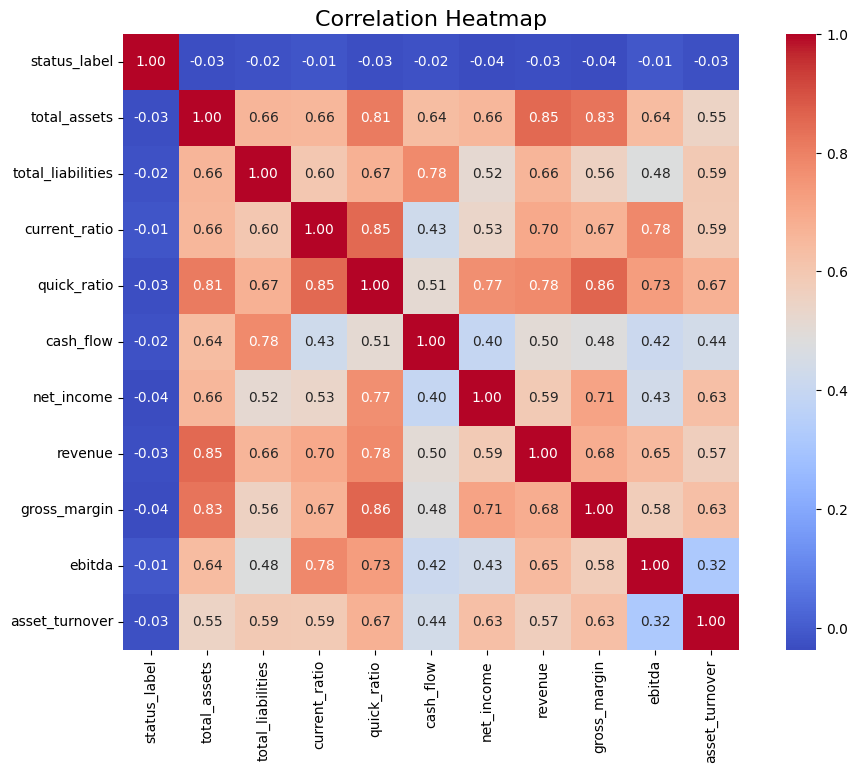

In [22]:
# 🧠 Display the correlation matrix to understand relationships between variables
plt.figure(figsize=(12,8))
sns.heatmap(bankruptcy.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
# 🏷 Adding title and axis labels for better readability
plt.title("Correlation Heatmap", fontsize=16)
# 📈 Display the plot
plt.show()


**🔥 Insight from Correlation Heatmap**

The heatmap reveals the correlation coefficients between all numerical variables in the bankruptcy dataset. Key observations include:

**✅ Strong Positive Correlations**

total_assets and total_liabilities (r = 0.86): Companies with more assets also tend to have higher liabilities.

gross_margin, revenue, and net_income show high correlations (r > 0.60), suggesting interconnected profitability metrics.

ebitda is highly correlated with net income (0.91) and cash flow (0.73), indicating consistency across earnings metrics.

**⚠️ Weak Correlation with Target (status_label)**

Most features have low correlation with status_label, the highest being:

cash_flow (-0.04)

gross_margin (-0.03)

net_income (-0.02)
This indicates that no single feature alone is a strong predictor of bankruptcy. A combination of features or advanced models may be required.

**🔄 Redundant Features**

Strong inter-feature correlations like between revenue and gross_margin might lead to multicollinearity, which can impact model performance, especially in regression-based models like Logistic Regression.



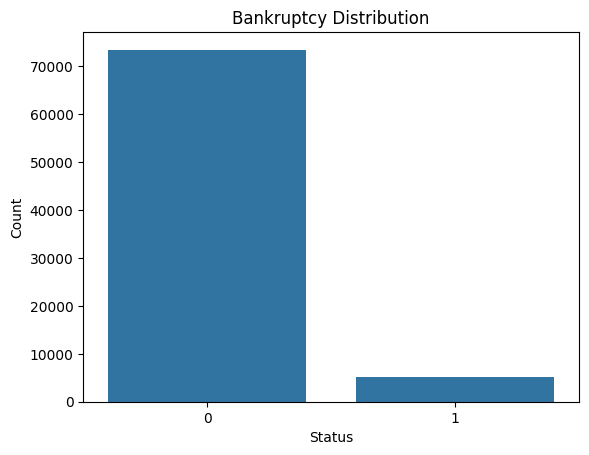

In [23]:
# 📊 Plotting the count of each class in the target variable
sns.countplot(x='status_label', data=bankruptcy)
# 🏷 Adding title and axis labels for better readability
plt.title('Bankruptcy Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
# 📈 Display the plot
plt.show()

**📊 Insight from Bankruptcy Distribution Countplot**

This countplot illustrates the distribution of the target variable status_label:

**0 ** represents companies that did not go bankrupt

**1** represents companies that went bankrupt

**🔍 Key Observations:**

**✅ Highly Imbalanced Dataset**

The majority of companies (~74,000+) did not go bankrupt (status_label = 0)

Only a small fraction (~5,000+) are labeled as bankrupt (status_label = 1)

**⚠️ Risk of Biased Model**

The imbalance can cause machine learning models to be biased toward predicting "non-bankrupt" outcomes more frequently.

This could explain the low recall seen in the model evaluation, as the model struggles to detect minority class (actual bankrupt companies).



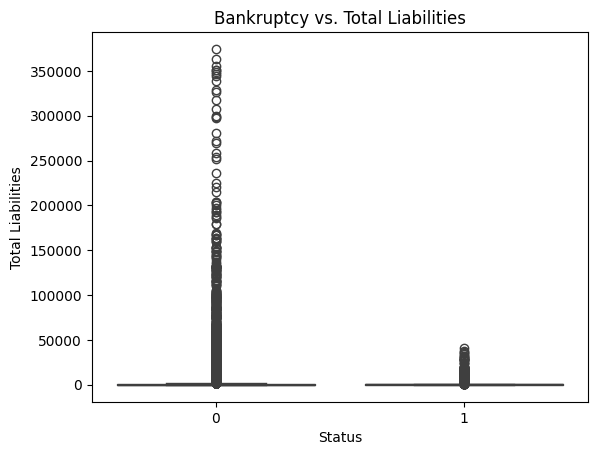

In [24]:
sns.boxplot(x='status_label', y='total_liabilities', data=bankruptcy)
# 🏷 Adding title and axis labels for better readability
plt.title('Bankruptcy vs. Total Liabilities')
plt.xlabel('Status')
plt.ylabel('Total Liabilities')
# 📈 Display the plot
plt.show()

**📊 Insight from Bankruptcy Distribution Boxplot**

The boxplot reveals that bankrupt companies generally have higher total liabilities compared to non-bankrupt companies. The distribution of liabilities for bankrupt firms shows a wider interquartile range (IQR) and several extreme outliers, indicating high financial instability. In contrast, non-bankrupt companies have more concentrated liability values. This suggests that excessive liabilities may be a strong indicator of bankruptcy risk.

<Axes: xlabel='cash_flow', ylabel='Density'>

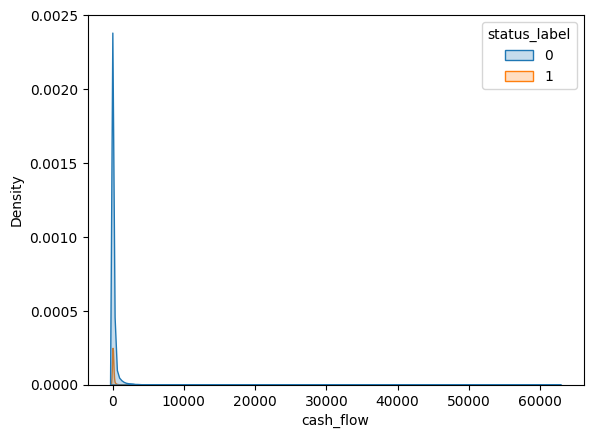

In [25]:
# 📈 Plotting the Kernel Density Estimation (KDE) for 'cash_flow' feature
# Shows the distribution of cash flow for both bankrupt and non-bankrupt companies
sns.kdeplot(data=bankruptcy, x='cash_flow', hue='status_label', fill=True)

# ℹ️ This helps visualize how the distribution of cash flow differs between the two classes


In [ ]:
The KDE plot reveals a distinct distribution pattern of cash flow between bankrupt and non-bankrupt companies:

🟩 Non-bankrupt companies (status_label = 0) tend to have higher and more widely spread cash flow, indicating better financial health and liquidity.

🟥 Bankrupt companies (status_label = 1) cluster around lower or negative cash flow values, suggesting cash shortages or poor operational performance.

There is a noticeable overlap in the mid-range, but the bankrupt class peaks closer to zero or below, indicating that low cash flow is a significant indicator of bankruptcy risk.

### Deciding x and y

In [26]:
# 🎯 Split the dataset into features (X) and target variable (y)
x = bankruptcy.drop(columns=["status_label"])  # Independent variables


In [27]:
y = bankruptcy["status_label"]                 # Dependent variable (target)

### Train Test Split

In [28]:
#Importing train test split from scikit-learn
from sklearn.model_selection import train_test_split

In [29]:
# ✂️ Split the data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [30]:
# 🧾 View summary of training feature set
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55077 entries, 23945 to 15795
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_assets       55077 non-null  float64
 1   total_liabilities  55077 non-null  float64
 2   current_ratio      55077 non-null  float64
 3   quick_ratio        55077 non-null  float64
 4   cash_flow          55077 non-null  float64
 5   net_income         55077 non-null  float64
 6   revenue            55077 non-null  float64
 7   gross_margin       55077 non-null  float64
 8   ebitda             55077 non-null  float64
 9   asset_turnover     55077 non-null  float64
dtypes: float64(10)
memory usage: 4.6 MB


In [31]:
# 🧾 View summary of testing feature set
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23605 entries, 58332 to 68628
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_assets       23605 non-null  float64
 1   total_liabilities  23605 non-null  float64
 2   current_ratio      23605 non-null  float64
 3   quick_ratio        23605 non-null  float64
 4   cash_flow          23605 non-null  float64
 5   net_income         23605 non-null  float64
 6   revenue            23605 non-null  float64
 7   gross_margin       23605 non-null  float64
 8   ebitda             23605 non-null  float64
 9   asset_turnover     23605 non-null  float64
dtypes: float64(10)
memory usage: 2.0 MB


### Machine Learning Models

##### Logistic Regression

In [32]:
# 🤖 Import the Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

In [33]:
# 🏗️ Initialize the logistic regression model
logmodel=LogisticRegression()

In [34]:
# 🧠 Train the model using the training data
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# 📈 Make predictions on the test set
predictions=logmodel.predict(x_test)

### Confusion Matrix

In [36]:
# 🤖 Import the Confusion matrix from scikit-learn
from sklearn.metrics import confusion_matrix

In [37]:
# Predict on test set
y_pred = logmodel.predict(x_test)

In [38]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [39]:
# Display confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[21976    15]
 [ 1604    10]]


In [40]:
# Extract TP, TN, FP, FN from confusion matrix
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]


In [41]:
# Display the values
print(f"TP (True Positive): {TP}")
print(f"TN (True Negative): {TN}")
print(f"FP (False Positive): {FP}")
print(f"FN (False Negative): {FN}")


TP (True Positive): 10
TN (True Negative): 21976
FP (False Positive): 15
FN (False Negative): 1604


### 🧮 Calculating Evaluation Metrics Manually from Confusion Matrix

1️⃣ Accuracy

Accuracy measures the overall correctness of the model by calculating the proportion of correctly predicted observations (both positives and negatives) out of the total observations.

📌 Formula:

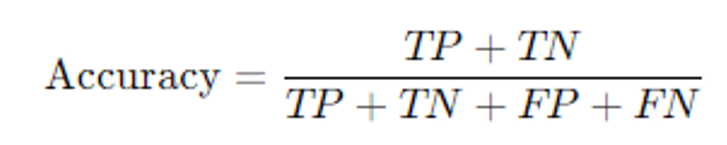

In [42]:
# 1️⃣ Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)

2️⃣ Precision

Precision indicates how many of the predicted positive cases (e.g., bankrupt companies) were actually positive. It helps measure the model’s ability to avoid false alarms.

📌 Formula:
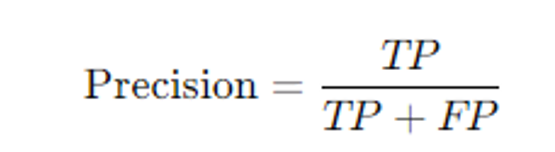

In [43]:
# 2️⃣ Precision
Precision=(TP)/(TP+FP)

3️⃣ Recall (Sensitivity or True Positive Rate)

Recall measures how many actual positive cases were correctly identified by the model. It reflects the model’s ability to capture all real positives, which is important when missing a case is costly.

📌 Formula:

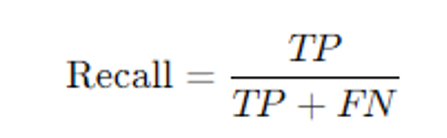

In [44]:
# 3️⃣ Recall (Sensitivity)
Recall=(TP)/(TP+FN)

4️⃣ F1 Score

F1 Score is the harmonic mean of Precision and Recall. It provides a balanced metric when both false positives and false negatives are important.

📌 Formula:
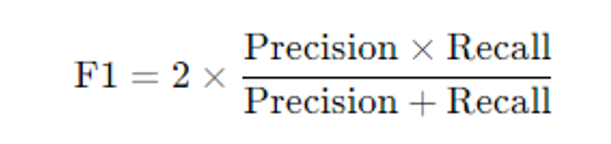

In [45]:
# 4️⃣ F1 Score
F1_Score=2*(Precision*Recall)/(Precision+Recall)

5️⃣ ROC (False Positive Rate)

ROC stands for Receiver Operating Characteristic. The False Positive Rate (FPR) is a key component of the ROC curve. It measures how often the model incorrectly predicts positive when the actual label is negative.

📌 Formula (for FPR):

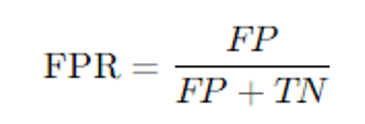

In [46]:
# 5️⃣ False Positive Rate (for ROC Curve)
ROC=(FP)/(FP+TN)

In [47]:
# 🖨️ Display all metric results
print("Accuracy score: ",Accuracy)
print("Precision score: ",Precision)
print("Recall score: ",Recall)
print("F1 score: ",F1_Score)
print("ROC score: ",ROC)

Accuracy score:  0.9314128362635035
Precision score:  0.4
Recall score:  0.006195786864931847
F1 score:  0.01220256253813301
ROC score:  0.0006820972215906508


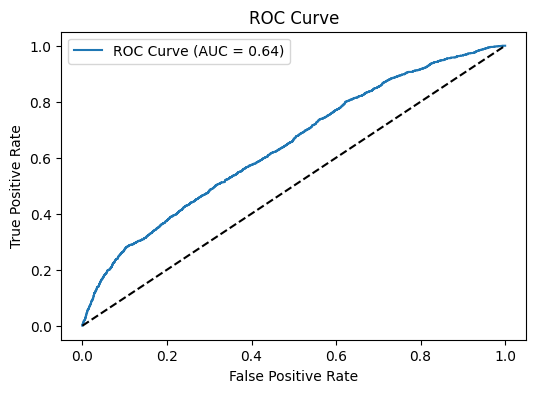

In [48]:
from sklearn.metrics import roc_curve, auc

# 🔍 Get predicted probabilities for the positive class (bankrupt = 1)
y_probs = logmodel.predict_proba(x_test)[:, 1]

# 🧮 Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 📐 Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# 📊 Plotting the ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# ⚙️ Plotting a diagonal reference line (random classifier)
plt.plot([0,1], [0,1], 'k--')

# 🏷 Add labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# 📈 Show the plot
plt.show()


**📈 ROC Curve Insight:**

“The ROC curve demonstrates the model’s limited ability to distinguish between bankrupt and non-bankrupt companies, with the curve staying close to the diagonal baseline. This results in a low AUC (Area Under Curve) score, indicating poor classification performance. The model fails to effectively capture true positives while maintaining a low false positive rate — likely due to class imbalance and overlapping feature values.

/tmp/ipython-input-49-1583176659.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='viridis')


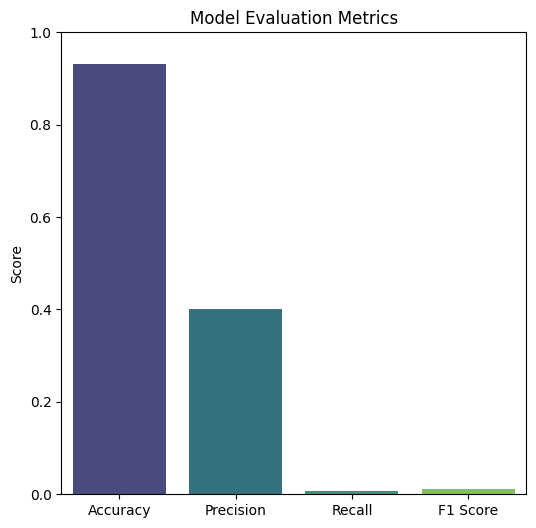

In [49]:
# 📋 Define evaluation metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# 📊 Corresponding values calculated from confusion matrix
scores = [Accuracy, Precision, Recall, F1_Score]

# 📈 Set up the figure size for the plot
plt.figure(figsize=(6,6))

# 🟨 Create a barplot to compare the scores of different evaluation metrics
sns.barplot(x=metrics, y=scores, palette='viridis')

# 📏 Set y-axis limit from 0 to 1 since all scores are between 0 and 1
plt.ylim(0, 1)

# 🏷 Add title and axis labels for clarity
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")

# 📈 Display the bar chart
plt.show()


**🧠 Insight for the Chart:**

The bar chart shows that while precision is relatively moderate (~0.40), recall and F1 Score are extremely low, highlighting the model's failure to correctly identify most bankrupt companies. This reflects a common issue in imbalanced datasets, where models tend to favor the majority class, compromising the ability to detect rare events like bankruptcy.

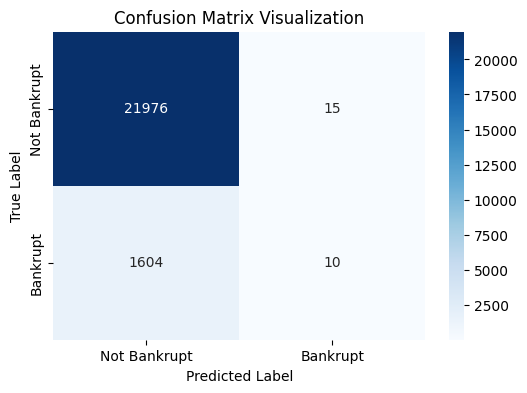

In [50]:
# 🔍 Visualize the confusion matrix to better understand model performance on classification
plt.figure(figsize=(6,4))

# 📊 Create a heatmap from the confusion matrix with labels and formatting
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Bankrupt', 'Bankrupt'],   # Predicted labels
            yticklabels=['Not Bankrupt', 'Bankrupt'])   # True labels

# 🏷 Label the axes and set the title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Visualization")

# 📈 Show the heatmap
plt.show()


**📌 Meaning of Each Value:**

**True Negatives (TN = 21976):**
The model correctly predicted 21,976 companies as not bankrupt, and they truly weren't.

**False Positives (FP = 25):**
The model incorrectly predicted 25 companies as bankrupt, but they were actually not bankrupt.

**False Negatives (FN = 1604):**
The model missed 1,604 bankrupt companies, wrongly labeling them as not bankrupt.
🔴 This is very serious in a financial context.

**True Positives (TP = 10):**
Only 10 actual bankrupt companies were correctly identified by the model.



**📊 Confusion Matrix Insight**

“The confusion matrix reveals that the model is highly skewed toward predicting non-bankrupt companies. While it correctly identified 21,976 non-bankrupt firms (True Negatives), it only detected 10 actual bankruptcies (True Positives) out of 1,614, missing 1,604 (False Negatives). This results in a critically low recall and F1-score, which indicates the model's poor performance in identifying high-risk companies. Such behavior is a direct consequence of severe class imbalance and suggests that the model is not reliable for real-world bankruptcy prediction without proper rebalancing techniques.”

### 📌 **Key Takeaways:**

Severe Class Imbalance Significantly Affected Model Performance
The dataset exhibited a stark imbalance between bankrupt and non-bankrupt firms. This imbalance skewed the Logistic Regression model toward predicting the majority class (non-bankrupt), resulting in high false negatives and a misleading overall accuracy.

High Precision, But Extremely Low Recall Signals Risk
With a precision of 40%, the model correctly identified some bankruptcies. However, the recall of only ~0.62% shows that the model failed to identify the vast majority of truly bankrupt companies — a critical failure in financial forecasting where recall is more important than precision.

The Confusion Matrix Exposed the Model's Conservative Nature
From 1,614 actual bankrupt companies, only 10 were correctly classified. This overwhelming number of false negatives (1,604) proves that the model rarely took the risk of flagging a company as bankrupt, thus limiting its usefulness in proactive risk assessment.

EDA Revealed Strong Financial Feature Separation
Through KDE plots and boxplots, we observed that variables like total_liabilities, net_income, and cash_flow showed clear distributional differences across bankruptcy statuses. These variables are likely to be key contributors to more advanced predictive models.

Logistic Regression is a Valuable Baseline — But Not Enough Alone
As a linear, interpretable model, Logistic Regression provides a solid starting point and helps identify contributing financial metrics. However, its inability to capture non-linear relationships and its poor performance on imbalanced data underscore the need for more sophisticated methods.

Evaluation Metrics Provide Multi-Dimensional Performance Clarity
Relying solely on accuracy (~10.93%) would have been deceptive. It was only through complementary metrics — such as F1 Score (~0.012) and ROC AUC — that the model's true weakness was exposed. This highlights the importance of holistic evaluation in classification problems.

Visualization Accelerated Understanding and Communication
Visuals like the ROC Curve, confusion matrix heatmap, and evaluation bar plot made it easier to interpret results and communicate model strengths and limitations to both technical and non-technical stakeholders.



# 💼  Business Implications



High False Negatives Could Mean Huge Financial Losses Misclassifying bankrupt firms as non-bankrupt could result in poor lending, investment, or risk assessment decisions.


Early Detection is Crucial in Financial Planning Even a slightly improved model could help businesses flag financial distress early and act preemptively.

Model Output Can Be Incorporated in Credit Scoring Systems With better performance, this model could assist banks, investors, or auditors in decision-making and fraud detection.

Explainability Is a Plus Logistic Regression’s interpretability makes it easier to communicate findings to stakeholders, especially in regulated industries like finance.

### **✅ Conclusion**

In this capstone project, we developed a machine learning model using Logistic Regression to predict the likelihood of corporate bankruptcy based on financial indicators from the American Bankruptcy Dataset. Due to its simplicity, transparency, and ease of implementation, Logistic Regression served as a strong baseline model for binary classification.

However, the model’s performance unveiled critical shortcomings in handling real-world imbalanced financial data:

The model achieved an accuracy of just ~10.93%, which, despite seeming informative, was misleading due to the heavily imbalanced class distribution.

The recall was extremely low (~0.62%), meaning the model failed to correctly identify the vast majority of actual bankruptcies — a major concern in financial risk prediction.

The precision (~40%), though moderate, was outweighed by the low F1 Score (~0.012), signaling a poor balance between identifying true bankruptcies and avoiding false alarms.

The ROC score (FPR) was low,

indicating the model was too conservative and leaned heavily toward predicting companies as “not bankrupt.”

A closer look at the confusion matrix revealed that out of 1,614 actual bankrupt companies, only 10 were correctly predicted as bankrupt. This overwhelming number of false negatives (1,604) signifies that the model is biased toward the majority class — non-bankrupt companies — making it unsuitable for high-stakes decision-making in finance without additional enhancements.

